Research Ideas
- Can we create clusters organically using unsupervised methods and then predict the labels from the label?
- Predict whether a customer will churn or not?
- Understand customer past behaviour

# Documentation of libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score


import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

## EDA

In [2]:
df = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
# Check for missing values
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [4]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [5]:
# drop the last two columns which are irrelevant for our analysis
df = df.iloc[:, :-2]
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


/Users/Cecilia/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/Cecilia/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


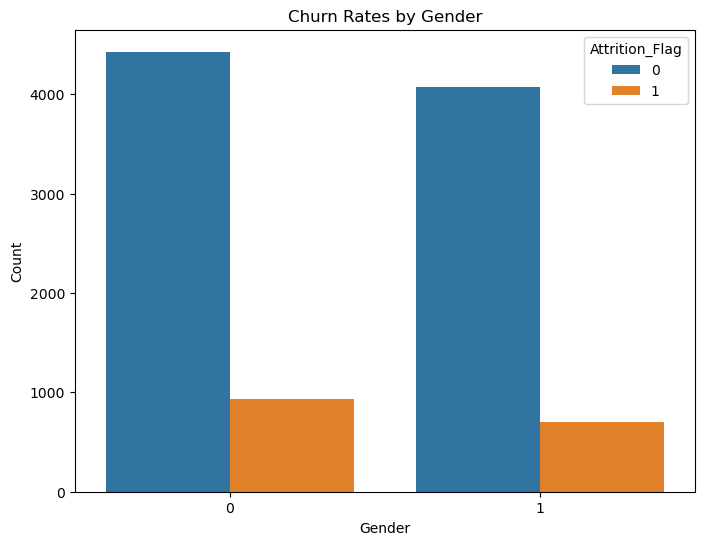

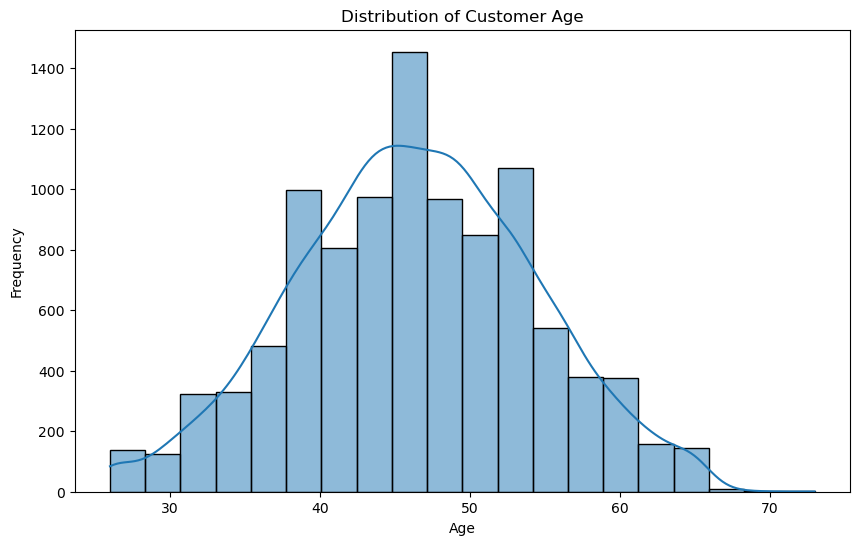

/Users/Cecilia/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


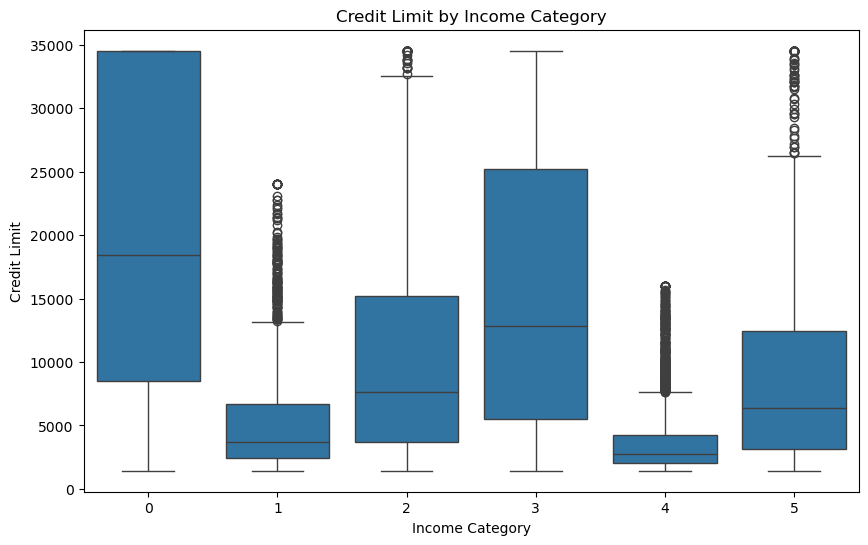

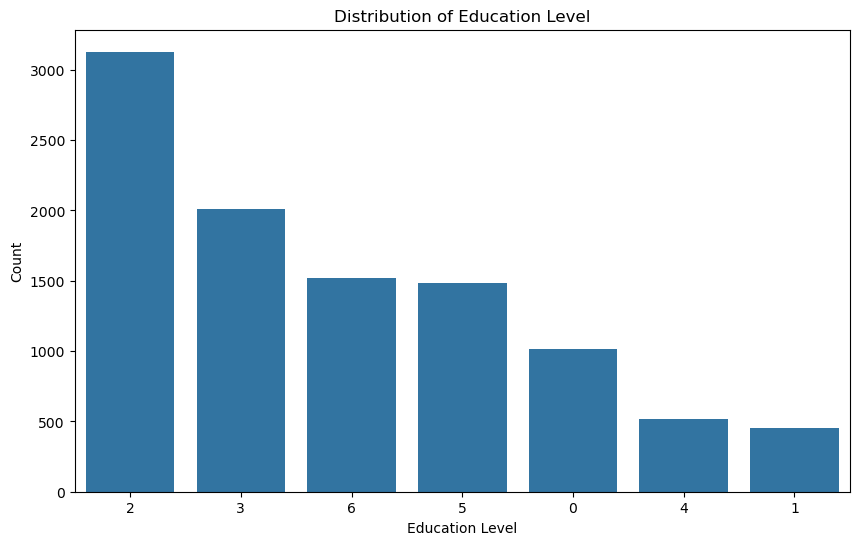

In [43]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Churn rates by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Attrition_Flag', data=df)
plt.title('Churn Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Customer_Age'], bins=20, kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Income_Category', y='Credit_Limit', data=df)
plt.title('Credit Limit by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Credit Limit')
plt.show()

# Visualize the distribution of categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(x='Education_Level', data=df, order=df['Education_Level'].value_counts().index)
plt.title('Distribution of Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

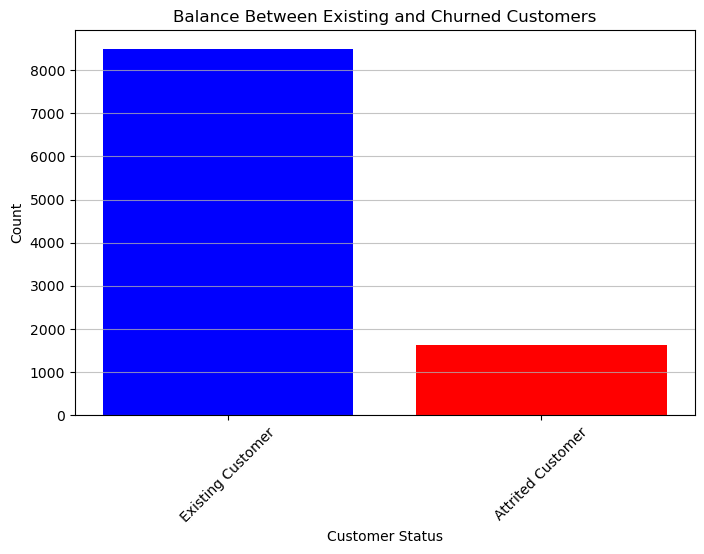

In [7]:
# Balance Between Existing and Churned Customers
attrition_counts = df['Attrition_Flag'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(attrition_counts.index, attrition_counts.values, color=['blue', 'red'])
plt.title('Balance Between Existing and Churned Customers')
plt.xlabel('Customer Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

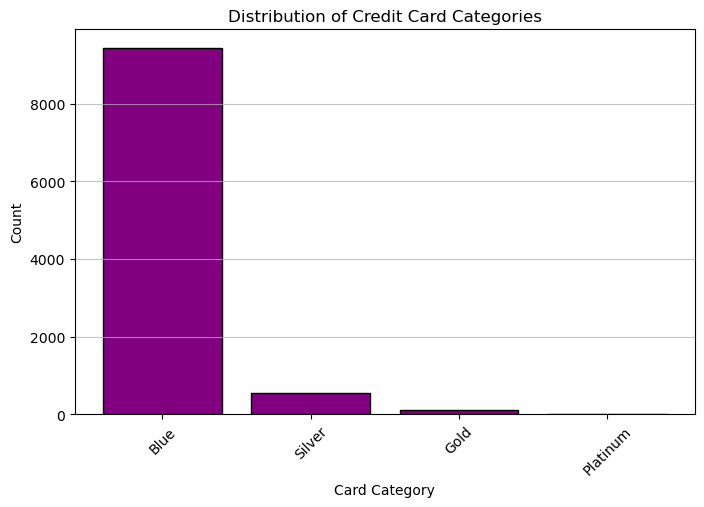

In [8]:
# Distribution of Credit Card Categories
card_category_counts = df['Card_Category'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(card_category_counts.index, card_category_counts.values, color='purple', edgecolor='black')
plt.title('Distribution of Credit Card Categories')
plt.xlabel('Card Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

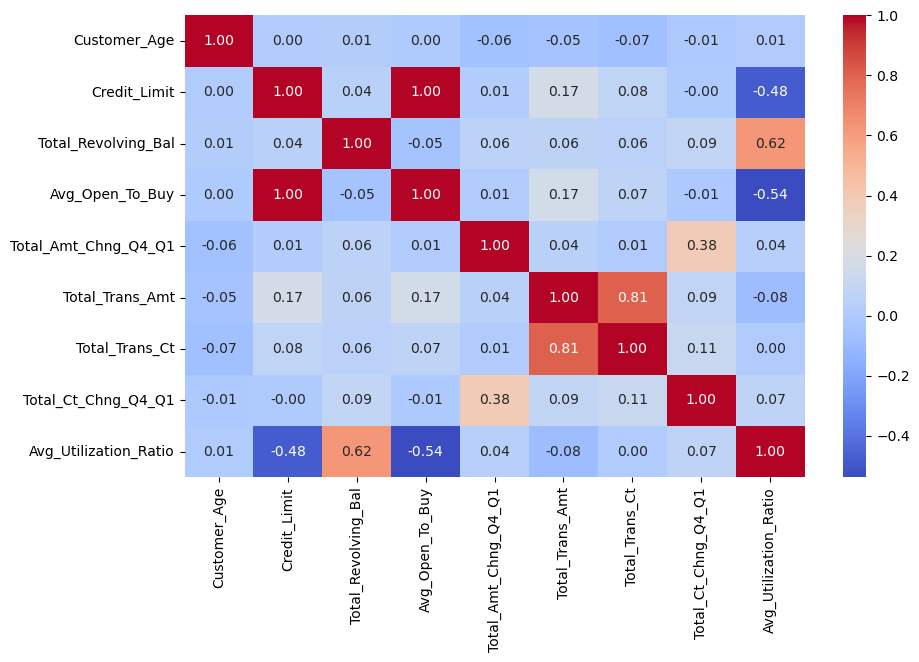

In [9]:
corr_matrix = df.loc[:, ['Customer_Age', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, annot_kws={'size':10}, fmt='.2f', cmap='coolwarm')
plt.show()

Text(0.5, 1.0, 'Pie Chart showing the distribution of the attrition flag variable')

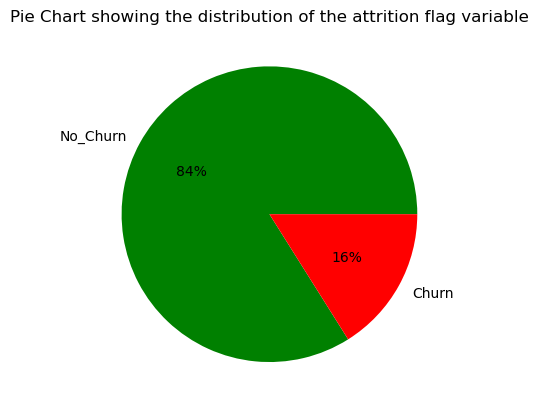

In [10]:
df['Attrition_Flag'].value_counts() 
# Existing Customer    8500
# Attrited Customer    1627
churn_df = df[df['Attrition_Flag'] == 'Attrited Customer']
non_churn_df = df[df['Attrition_Flag'] == 'Existing Customer']

plt.pie(df['Attrition_Flag'].value_counts(), labels = ['No_Churn','Churn'], autopct='%.0f%%', colors= 'gr')
plt.title("Pie Chart showing the distribution of the attrition flag variable")

(array([ 904., 1838., 2655., 2732., 1998.]),
 array([0., 1., 2., 3., 4., 5.]),
 <BarContainer object of 5 artists>)

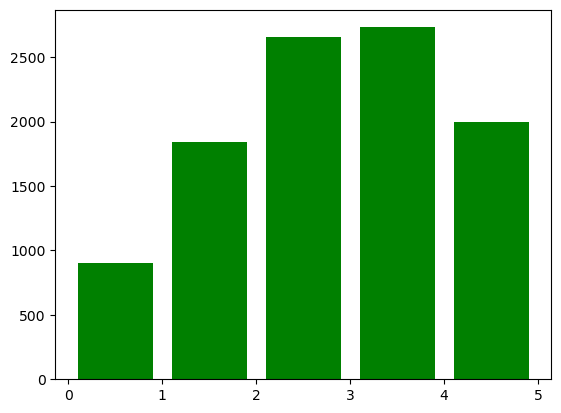

In [11]:
plt.hist(df['Dependent_count'], bins= 5, rwidth = 0.8, color='g')

(array([ 466., 1754., 4750., 2340.,  817.]),
 array([13. , 21.6, 30.2, 38.8, 47.4, 56. ]),
 <BarContainer object of 5 artists>)

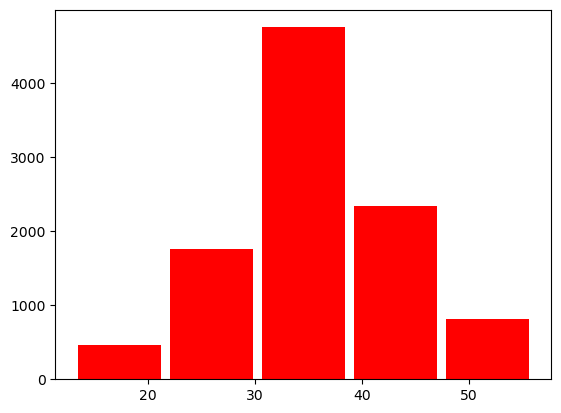

In [12]:
# Month_on_book
plt.hist(df['Months_on_book'], bins = 5, color = 'r', rwidth = 0.9)

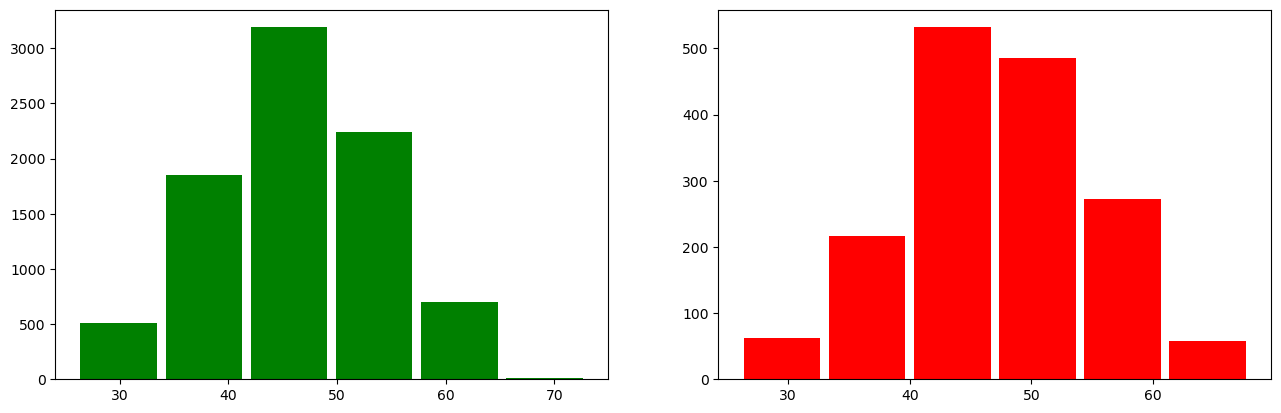

In [13]:
# Age
plt.subplot(1,2,1)
plt.hist(non_churn_df['Customer_Age'], rwidth = 0.9, color = 'g', bins = 6)

plt.subplot(1,2,2)
plt.hist(churn_df['Customer_Age'], rwidth = 0.9, color = 'r', bins = 6)

plt.subplots_adjust(left = 0.5, right = 2.4)

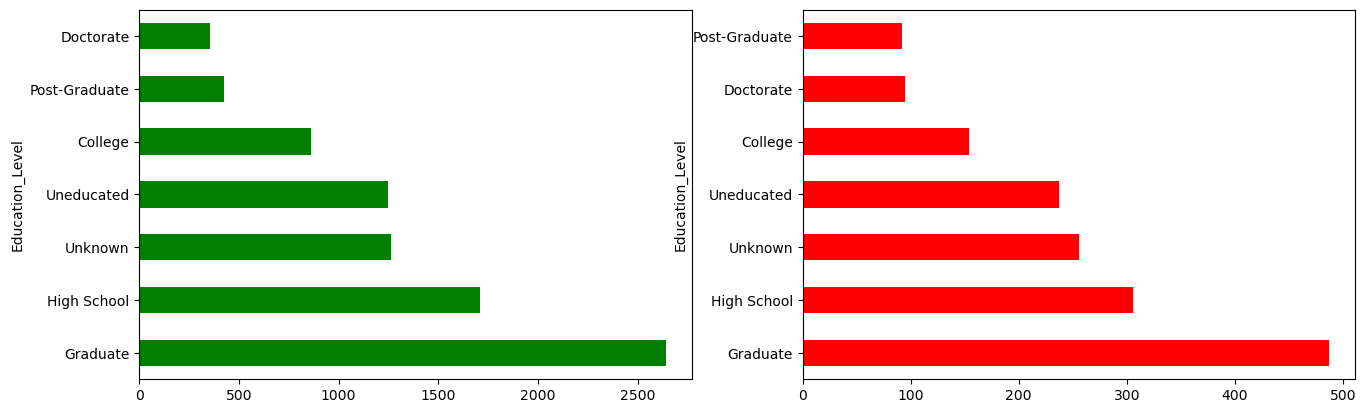

In [14]:
# Education
plt.subplot(1,2,1)
non_churn_df['Education_Level'].value_counts().plot(kind = 'barh', color = 'green')

plt.subplot(1,2,2)
churn_df['Education_Level'].value_counts().plot(kind = 'barh', color = 'red')

plt.subplots_adjust(left = 0.5, right= 2.4)

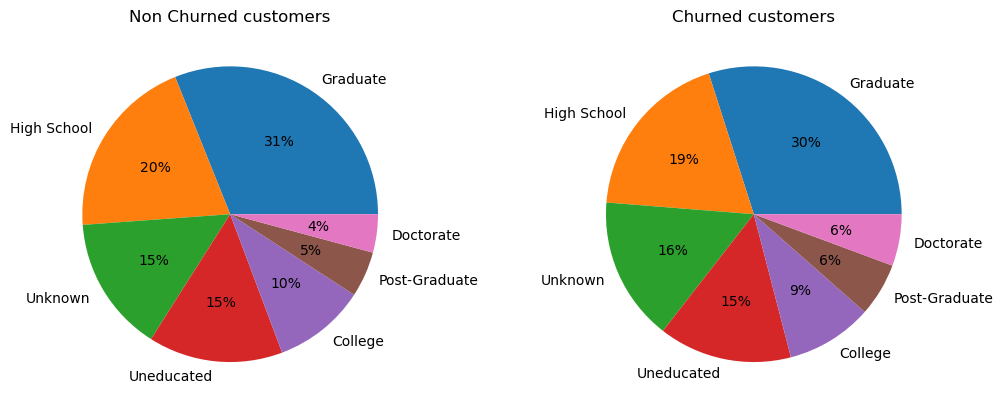

In [15]:
plt.subplot(1,2,1)
plt.pie(non_churn_df['Education_Level'].value_counts(),labels=['Graduate','High School','Unknown','Uneducated','College','Post-Graduate','Doctorate'],autopct='%.0f%%')
plt.title("Non Churned customers")

plt.subplot(1,2,2)
plt.pie(churn_df['Education_Level'].value_counts(),labels=['Graduate','High School','Unknown','Uneducated','College','Post-Graduate','Doctorate'], autopct='%.0f%%')
plt.title("Churned customers")

plt.subplots_adjust(left = 0.5, right = 2)
# not much difference?

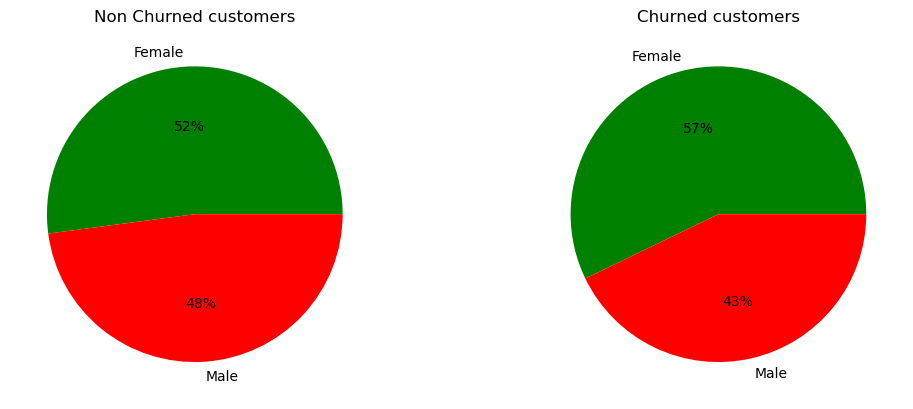

In [16]:
# Gender
plt.subplot(1,2,1)
plt.pie(non_churn_df['Gender'].value_counts(),labels= ['Female','Male'] ,autopct='%.0f%%', colors= 'gr')
plt.title("Non Churned customers")

plt.subplot(1,2,2)
plt.pie(churn_df['Gender'].value_counts(),labels = ['Female','Male'], autopct='%.0f%%', colors= 'gr')
plt.title("Churned customers")

plt.subplots_adjust(left = 0.5, right = 2)

/var/folders/g5/t835zv0x7sb7qvk1j7k7t9y40000gp/T/ipykernel_69733/2036917344.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = [df['Marital_Status'].value_counts()[3],df['Marital_Status'].value_counts()[2],df['Marital_Status'].value_counts()[1],df['Marital_Status'].value_counts()[0]]
/var/folders/g5/t835zv0x7sb7qvk1j7k7t9y40000gp/T/ipykernel_69733/2036917344.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = [df['Marital_Status'].value_counts()[3],df['Marital_Status'].value_counts()[2],df['Marital_Status'].value_counts()[1],df['Marital_Status'].value_counts()[0]]
/var/folders/g5/t835zv0x7sb7qvk1j7k7t9y40000

[Text(0, 0, '748'), Text(0, 0, '749'), Text(0, 0, '3943'), Text(0, 0, '4687')]

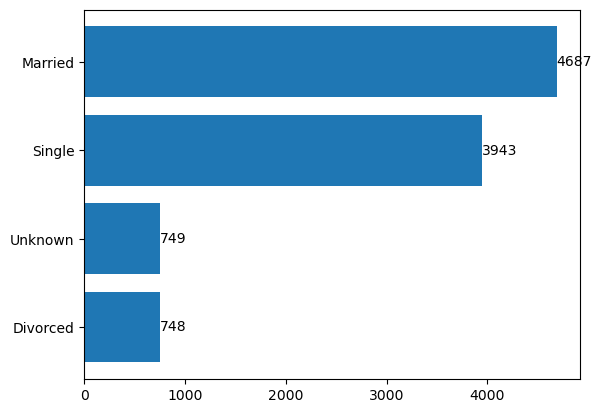

In [17]:
# Marital status
x = ['Divorced','Unknown','Single','Married']
y = [df['Marital_Status'].value_counts()[3],df['Marital_Status'].value_counts()[2],df['Marital_Status'].value_counts()[1],df['Marital_Status'].value_counts()[0]]
fig, ax = plt.subplots()
bars = ax.barh(x, y)
ax.bar_label(bars)

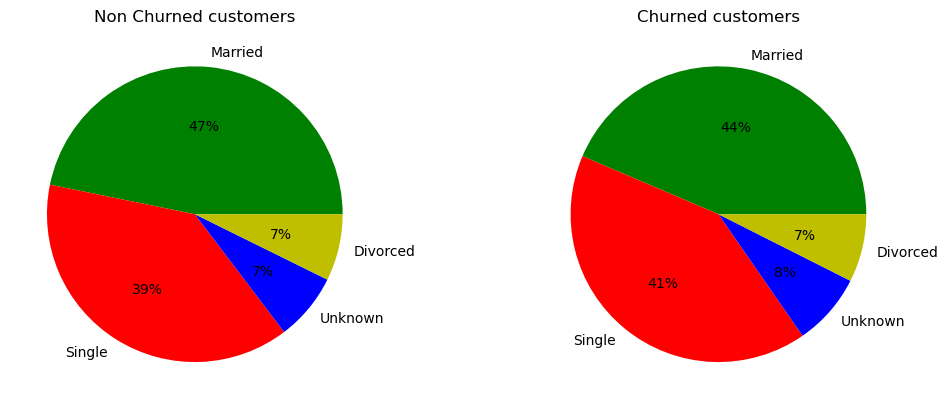

In [18]:
plt.subplot(1,2,1)
plt.pie(non_churn_df['Marital_Status'].value_counts(),labels= ['Married', 'Single', 'Unknown', 'Divorced'],autopct='%.0f%%', colors= 'grby')
plt.title("Non Churned customers")

plt.subplot(1,2,2)
plt.pie(churn_df['Marital_Status'].value_counts(),labels= ['Married', 'Single', 'Unknown', 'Divorced'], autopct='%.0f%%', colors= 'grby')
plt.title("Churned customers")

plt.subplots_adjust(left = 0.5, right = 2)

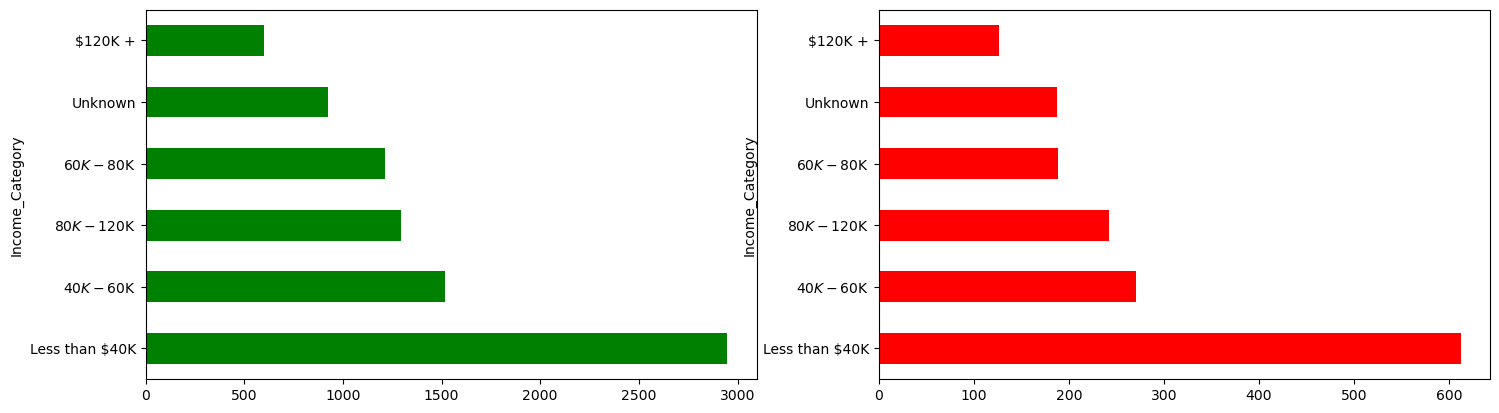

In [19]:
# Income Category
plt.subplot(1,2,1)
non_churn_df['Income_Category'].value_counts().plot(kind = 'barh', color = 'green')

plt.subplot(1,2,2)
churn_df['Income_Category'].value_counts().plot(kind = 'barh', color = 'red')

plt.subplots_adjust(left = 0.2, right = 2.3)

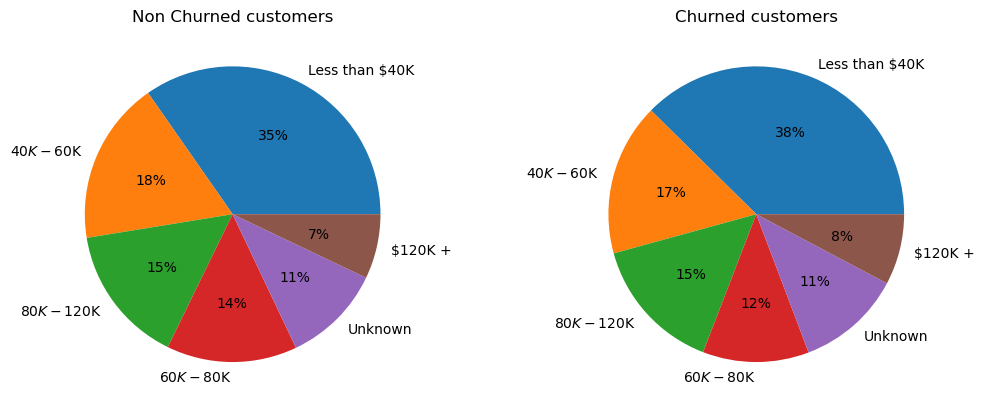

In [20]:
plt.subplot(1,2,1)
plt.pie(non_churn_df['Income_Category'].value_counts(),labels= ['Less than $40K','$40K - $60K','$80K - $120K','$60K - $80K','Unknown','$120K +'],autopct='%.0f%%')
plt.title("Non Churned customers")

plt.subplot(1,2,2)
plt.pie(churn_df['Income_Category'].value_counts(), labels=['Less than $40K','$40K - $60K','$80K - $120K','$60K - $80K','Unknown','$120K +']  ,autopct='%.0f%%')
plt.title("Churned customers")

plt.subplots_adjust(left = 0.5, right = 2)

/var/folders/g5/t835zv0x7sb7qvk1j7k7t9y40000gp/T/ipykernel_69733/113314128.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = [non_churn_df['Card_Category'].value_counts()[3],non_churn_df['Card_Category'].value_counts()[2],non_churn_df['Card_Category'].value_counts()[1],non_churn_df['Card_Category'].value_counts()[0]]
/var/folders/g5/t835zv0x7sb7qvk1j7k7t9y40000gp/T/ipykernel_69733/113314128.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = [non_churn_df['Card_Category'].value_counts()[3],non_churn_df['Card_Category'].value_counts()[2],non_churn_df['Card_Category'].value_counts()[1],non_churn_df['Card_Cate

[Text(0, 0, '15'), Text(0, 0, '95'), Text(0, 0, '473'), Text(0, 0, '7917')]

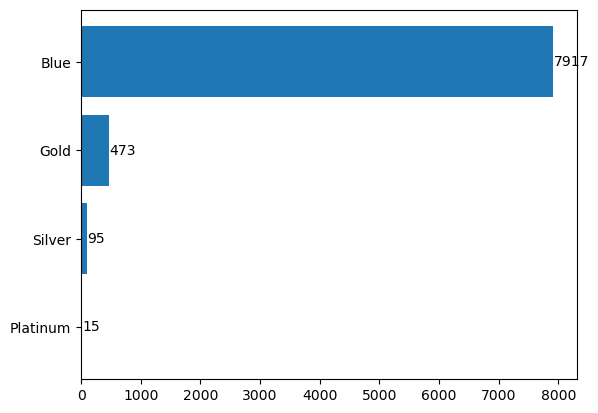

In [21]:
# Card Category
# non-churn
x = ['Platinum','Silver','Gold','Blue']
y = [non_churn_df['Card_Category'].value_counts()[3],non_churn_df['Card_Category'].value_counts()[2],non_churn_df['Card_Category'].value_counts()[1],non_churn_df['Card_Category'].value_counts()[0]]
fig, ax = plt.subplots()
bars = ax.barh(x, y)
ax.bar_label(bars)

/var/folders/g5/t835zv0x7sb7qvk1j7k7t9y40000gp/T/ipykernel_69733/2252304025.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = [churn_df['Card_Category'].value_counts()[3],churn_df['Card_Category'].value_counts()[2],churn_df['Card_Category'].value_counts()[1],churn_df['Card_Category'].value_counts()[0]]
/var/folders/g5/t835zv0x7sb7qvk1j7k7t9y40000gp/T/ipykernel_69733/2252304025.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = [churn_df['Card_Category'].value_counts()[3],churn_df['Card_Category'].value_counts()[2],churn_df['Card_Category'].value_counts()[1],churn_df['Card_Category'].value_counts()[0]]
/var

[Text(0, 0, '5'), Text(0, 0, '21'), Text(0, 0, '82'), Text(0, 0, '1519')]

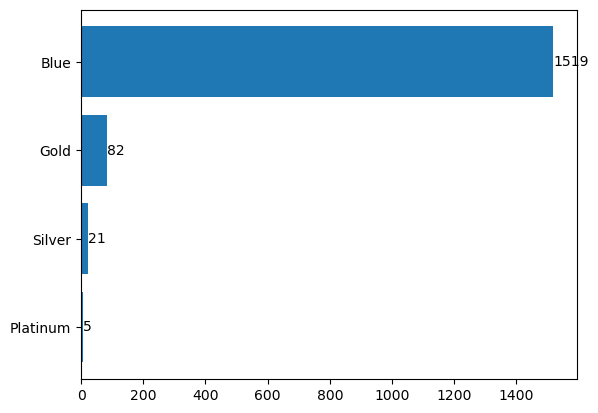

In [22]:
# churn
x = ['Platinum','Silver','Gold','Blue']
y = [churn_df['Card_Category'].value_counts()[3],churn_df['Card_Category'].value_counts()[2],churn_df['Card_Category'].value_counts()[1],churn_df['Card_Category'].value_counts()[0]]
fig, ax = plt.subplots()
bars = ax.barh(x, y)
ax.bar_label(bars)

In [23]:
# Percentage of churn: may due to the selection bias in sample
# Blue
print(churn_df['Card_Category'].value_counts()[3] / df['Card_Category'].value_counts()[3])
# Gold
print(churn_df['Card_Category'].value_counts()[2] / df['Card_Category'].value_counts()[2])
# Silver
print(churn_df['Card_Category'].value_counts()[1] / df['Card_Category'].value_counts()[1])
# Platinum
print(churn_df['Card_Category'].value_counts()[0] / df['Card_Category'].value_counts()[0])

0.25
0.1810344827586207
0.14774774774774774
0.1609792284866469


/var/folders/g5/t835zv0x7sb7qvk1j7k7t9y40000gp/T/ipykernel_69733/2750252170.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(churn_df['Card_Category'].value_counts()[3] / df['Card_Category'].value_counts()[3])
/var/folders/g5/t835zv0x7sb7qvk1j7k7t9y40000gp/T/ipykernel_69733/2750252170.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(churn_df['Card_Category'].value_counts()[3] / df['Card_Category'].value_counts()[3])
/var/folders/g5/t835zv0x7sb7qvk1j7k7t9y40000gp/T/ipykernel_69733/2750252170.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer

## PCA

In [24]:
# Identifying categorical columns that need to be encoded
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Removing the target variable 'Attrition_Flag' from the list of columns to encode
categorical_cols.remove('Attrition_Flag')

In [25]:
# Defining the preprocessing pipeline for scaling and encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), df.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Fitting the preprocessor
preprocessed_data = preprocessor.fit_transform(df.drop(['Attrition_Flag'], axis=1))

In [26]:
# Applying PCA
# Start with a PCA that retains 90% of the variance
pca = PCA(n_components=0.90)
pca_data = pca.fit_transform(preprocessed_data)

# Checking the number of components
num_components = pca.n_components_

num_components

16

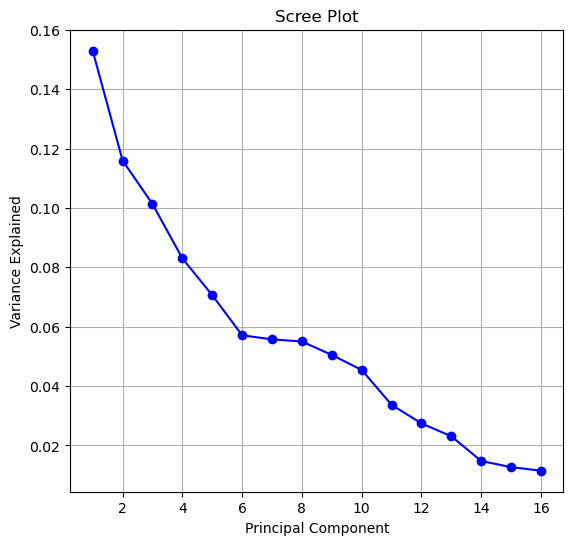

In [27]:
# Scree Plot
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_components + 1), pca.explained_variance_ratio_, 'o-', color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True)

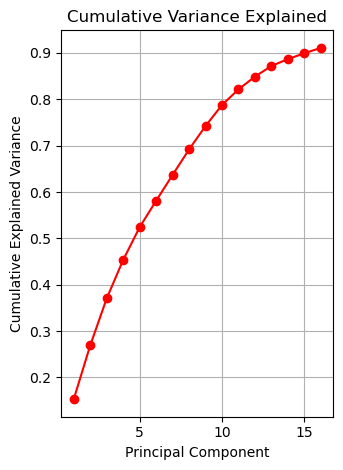

In [28]:
# Cumulative Variance Explained
plt.subplot(1, 2, 2)
plt.plot(range(1, num_components + 1), np.cumsum(pca.explained_variance_ratio_), 'o-', color='red')
plt.title('Cumulative Variance Explained')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)

plt.tight_layout()
plt.show()

## K-means

/Users/Cecilia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Cecilia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Cecilia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Cecilia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Cecil

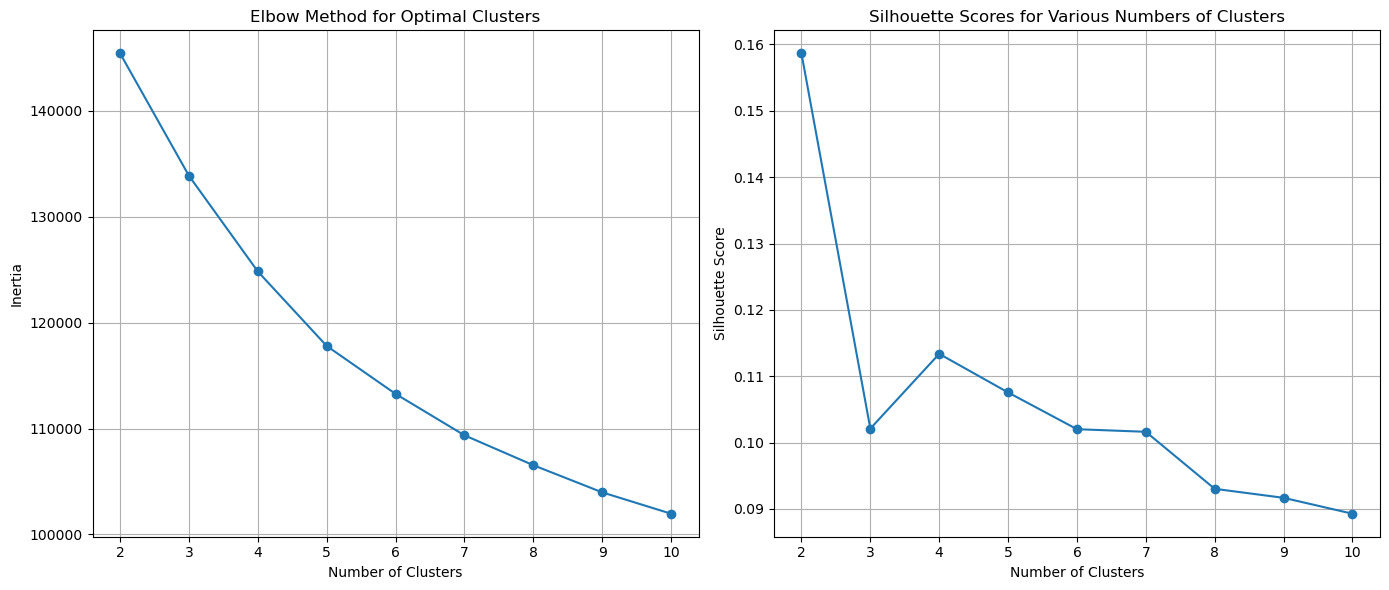

In [29]:
# Elbow Method to find the optimal number of clusters

inertias = []
silhouette_scores = []
range_clusters = range(2, 11)  # Checking for 2 to 10 clusters

for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(pca_data[:, :num_components])  # Fit on the first three principal components
    inertias.append(kmeans.inertia_)
    # Calculate silhouette score only if n_clusters > 1
    if n_clusters > 1:
        silhouette_scores.append(silhouette_score(pca_data[:, :num_components], kmeans.labels_))

# Plotting the Elbow Method results for Inertia
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range_clusters, inertias, '-o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range_clusters)
plt.grid(True)

# Plotting Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range_clusters, silhouette_scores, '-o')  # Adjusting range to match silhouette scores' range
plt.title('Silhouette Scores for Various Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range_clusters)
plt.grid(True)

plt.tight_layout()
plt.show()


Based on the elbow method and Silhouette scores, we chose n_clusters = 3 as the optimal number of clusters.

/Users/Cecilia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


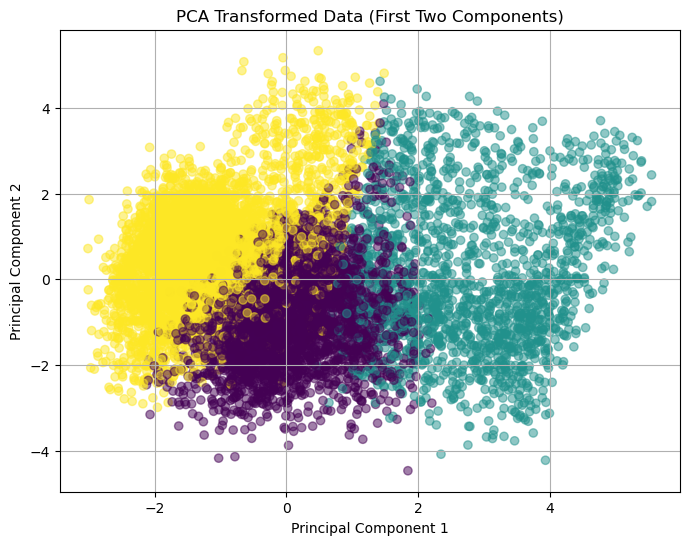

In [30]:
n_clusters = 3

# Perform KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(pca_data[:, :num_components])  # Using only the first three components for clustering


# Plot the PCA transformed data, plotting the first two principal components as a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='viridis', marker='o', alpha=0.5)
plt.title('PCA Transformed Data (First Two Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

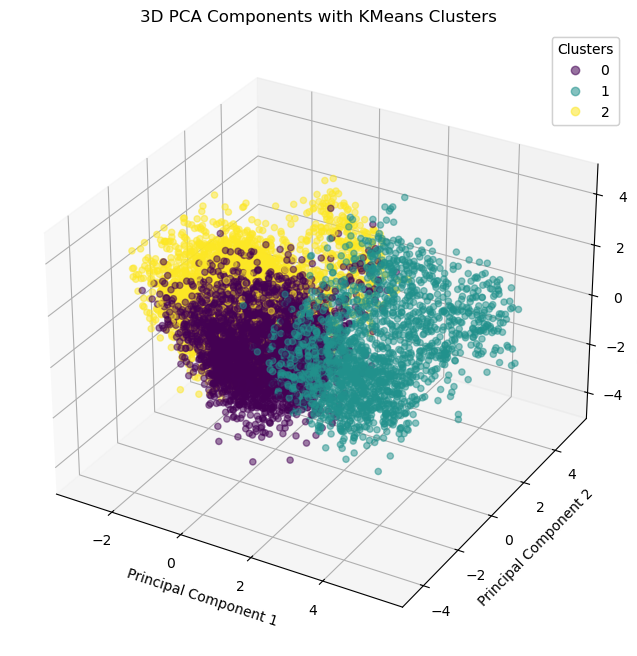

In [31]:
# Plotting the clusters in 3d
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the first three PCA components with cluster labels
scatter = ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=cluster_labels, cmap='viridis', marker='o', alpha=0.5)

# Creating a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D PCA Components with KMeans Clusters')

plt.show()


Attrition_Flag  Attrited Customer  Existing Customer
cluster                                             
0                            1081               2597
1                             215               1646
2                             331               4257


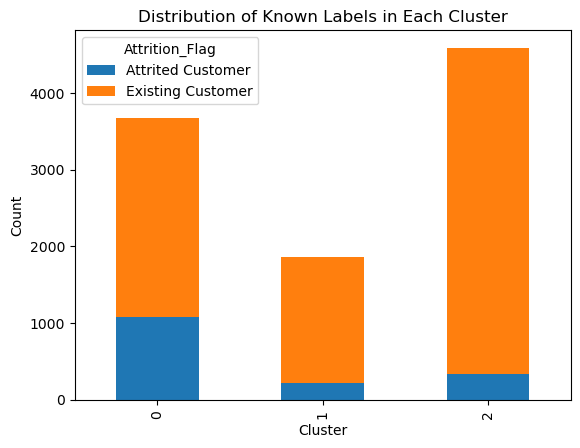

In [32]:
# Create a DataFrame from known labeled data
data_with_known_labels = df.copy()

# Add the cluster assignments to your DataFramed
data_with_known_labels['cluster'] = cluster_labels

# Group by cluster label and count the known labels within each cluster
cluster_label_distribution = data_with_known_labels.groupby(['cluster', 'Attrition_Flag']).size().unstack(fill_value=0)

# Now you can visualize or analyze the distribution
print(cluster_label_distribution)

# Plot the distribution of known labels for each cluster
cluster_label_distribution.plot(kind='bar', stacked=True)
plt.title('Distribution of Known Labels in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

<Axes: ylabel='Education_Level'>

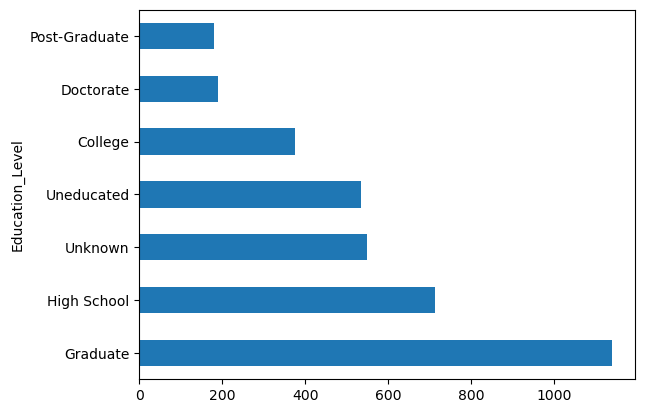

In [44]:
data_with_known_labels[data_with_known_labels['cluster'] == 0]['Education_Level'].value_counts().plot(kind = 'barh')

<Axes: ylabel='Education_Level'>

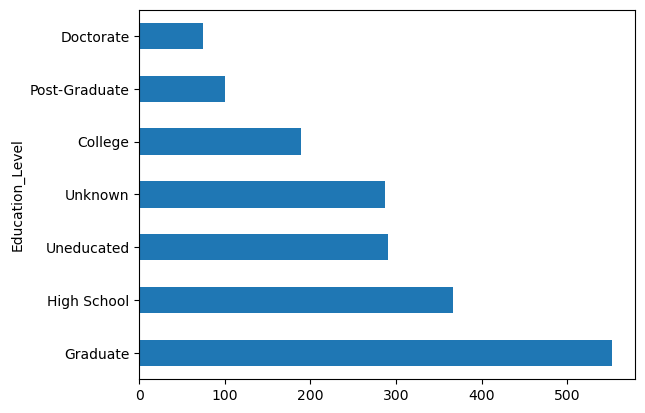

In [45]:
data_with_known_labels[data_with_known_labels['cluster'] == 1]['Education_Level'].value_counts().plot(kind = 'barh')

<Axes: ylabel='Education_Level'>

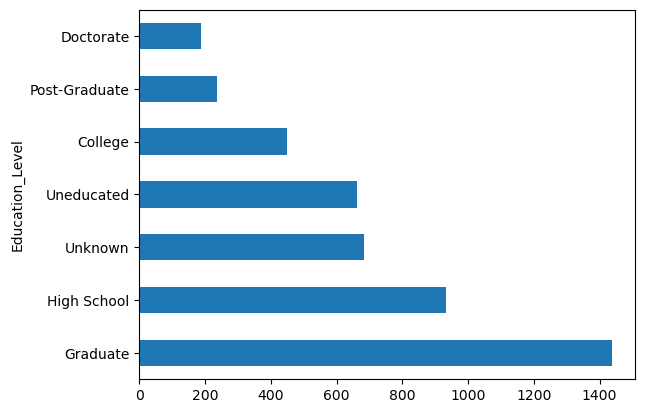

In [46]:
data_with_known_labels[data_with_known_labels['cluster'] == 2]['Education_Level'].value_counts().plot(kind = 'barh')

<Axes: ylabel='Income_Category'>

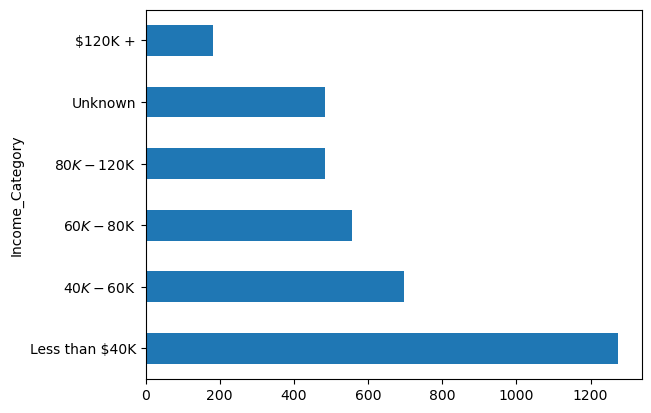

In [47]:
data_with_known_labels[data_with_known_labels['cluster'] == 0]['Income_Category'].value_counts().plot(kind = 'barh')

<Axes: ylabel='Income_Category'>

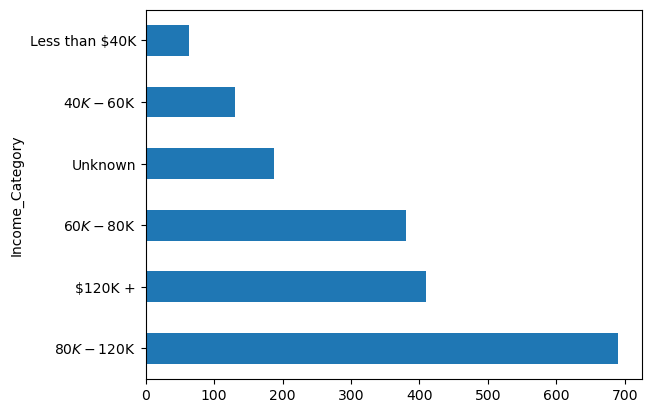

In [48]:
data_with_known_labels[data_with_known_labels['cluster'] == 1]['Income_Category'].value_counts().plot(kind = 'barh')

<Axes: ylabel='Income_Category'>

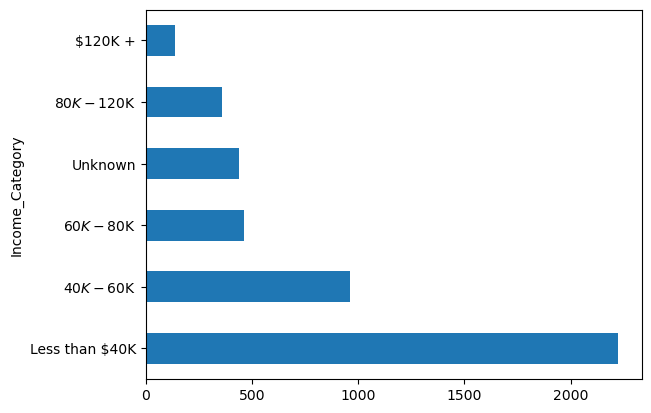

In [49]:
data_with_known_labels[data_with_known_labels['cluster'] == 2]['Income_Category'].value_counts().plot(kind = 'barh')

<Axes: ylabel='Marital_Status'>

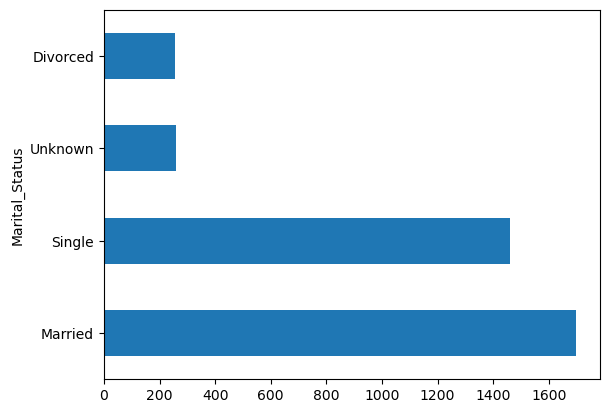

In [50]:
data_with_known_labels[data_with_known_labels['cluster'] == 0]['Marital_Status'].value_counts().plot(kind = 'barh')

<Axes: ylabel='Marital_Status'>

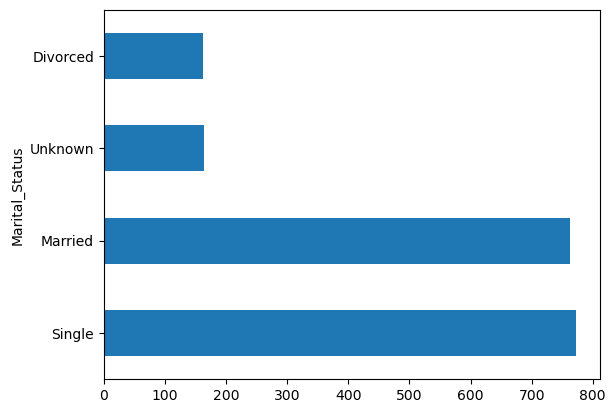

In [51]:
data_with_known_labels[data_with_known_labels['cluster'] == 1]['Marital_Status'].value_counts().plot(kind = 'barh')

<Axes: ylabel='Marital_Status'>

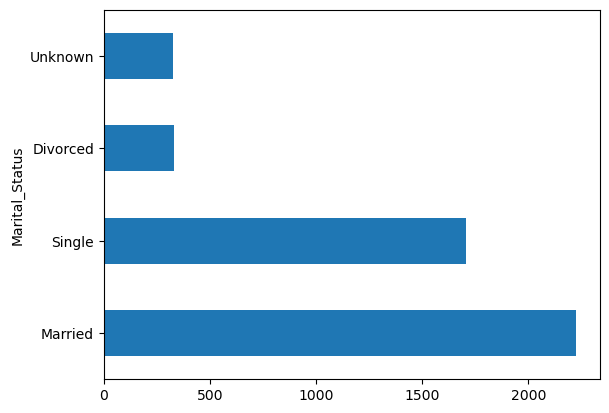

In [52]:
data_with_known_labels[data_with_known_labels['cluster'] == 2]['Marital_Status'].value_counts().plot(kind = 'barh')

# Sup model: predicting churn rate for each card type

In [33]:
# Encode the categorical variables and prepare the final dataset
categorical_columns = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Add the cluster labels to the dataframe
df['Cluster_Labels'] = cluster_labels

# Selecting relevant features and excluding specific columns
feature_columns = [col for col in df.columns if col not in ['CLIENTNUM']]

# Including Cluster_Labels in the features
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})
X = df[feature_columns].drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Applying SMOTE to generate synthetic samples for the minority class in the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [34]:
df[feature_columns].drop('Attrition_Flag', axis=1).head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Cluster_Labels
0,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,2
2,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,2
3,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,2
4,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,2


In [35]:
y_train_smote.value_counts()

Attrition_Flag
0    5957
1    5957
Name: count, dtype: int64

In [36]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=5000, random_state=42)

# Train the model
log_reg.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
log_reg_auc = roc_auc_score(y_test, y_pred)
log_reg_precision = precision_score(y_test, y_pred)
log_reg_recall = recall_score(y_test, y_pred)
log_reg_f1 = f1_score(y_test, y_pred)

log_reg_metrics = {
    "AUC Score": log_reg_auc,
    "Precision": log_reg_precision,
    "Recall": log_reg_recall,
    "F1 Score": log_reg_f1
}

log_reg_metrics

{'AUC Score': 0.8028506463029442,
 'Precision': 0.4469525959367946,
 'Recall': 0.7983870967741935,
 'F1 Score': 0.573082489146165}

In [37]:
# Fine tuning for Random Forest model

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the Grid Search model
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search_rf.fit(X_train_smote, y_train_smote)

# Best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

# Output the best parameters and best score
print("Best Parameters:", best_params_rf)
print("Best Score:", best_score_rf)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9740649289422837


In [38]:
# Refit the Random Forest Classifier with the specified best parameters
rf_clf_best = RandomForestClassifier(**best_params_rf, random_state=42)
rf_clf_best.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_rf = rf_clf_best.predict(X_test)

# Evaluate the Random Forest model
rf_auc = roc_auc_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

# Summarize the metrics for the best rf model
rf_metrics_best = {
    "AUC Score": rf_auc,
    "Precision": rf_precision,
    "Recall": rf_recall,
    "F1 Score": rf_f1
}

rf_metrics_best

{'AUC Score': 0.9247447927898215,
 'Precision': 0.8613861386138614,
 'Recall': 0.8770161290322581,
 'F1 Score': 0.8691308691308691}

In [39]:
# Fine tuning for Gradient Boosting model

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5]
}

# Initialize the Grid Search model
grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

({'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150},
 0.9770027902021107)

In [40]:
# Refit the Gradient Boosting Classifier with the specified best parameters
gb_clf_best = GradientBoostingClassifier(learning_rate=0.01, max_depth=3, n_estimators=150, random_state=42)
gb_clf_best.fit(X_train_smote, y_train_smote)
# Predict on the test set
y_pred_gb = gb_clf_best.predict(X_test)
# Evaluate the Gradient Boosting model
gb_auc  = roc_auc_score(y_test, y_pred_gb)
gb_precision = precision_score(y_test, y_pred_gb)
gb_recall = recall_score(y_test, y_pred_gb)
gb_f1 = f1_score(y_test, y_pred_gb)

# Summarize the metrics for the best gb model
gb_metrics_best = {
    "AUC Score": gb_auc,
    "Precision": gb_precision,
    "Recall": gb_recall,
    "F1 Score": gb_f1
}

gb_metrics_best

{'AUC Score': 0.9057790677761851,
 'Precision': 0.6284530386740331,
 'Recall': 0.9173387096774194,
 'F1 Score': 0.7459016393442622}

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   3.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.7s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.5s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; t